#  Word Cloud

In [6]:
# The installs and imports needed for the word cloud script and uploader widget

#!pip install wordcloud
#!pip install fileupload
#!pip install ipywidgets
#!jupyter nbextension install --py --user fileupload
#!jupyter nbextension enable --py fileupload
#import io
#import sys

import fileupload
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


In [7]:
# The uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Belarus.txt` (61.70 kB)


In [8]:
def calculate_frequencies(file_contents):
    
    # List of punctuations and uninteresting words 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "during", "since", "after", "in", "also", "other", "for", "on"]
    
    # Remove punctuation
    for letter in file_contents:
        if letter in punctuations:
            file_contents.replace(letter, '')
            
    # Creating words dictionary
    words_map = {}
    words_list = file_contents.split()
    
    for word in words_list:
        # Upper case word should be equlal to the same lower case word
        word = word.lower()
        # Choose relevant words and add them to the dictionary
        if word.isalpha() and not word in uninteresting_words:
            if word in words_map:
                words_map[word] = words_map[word] + 1
            else:
                words_map[word] = 1

    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(words_map)
    return cloud.to_array()

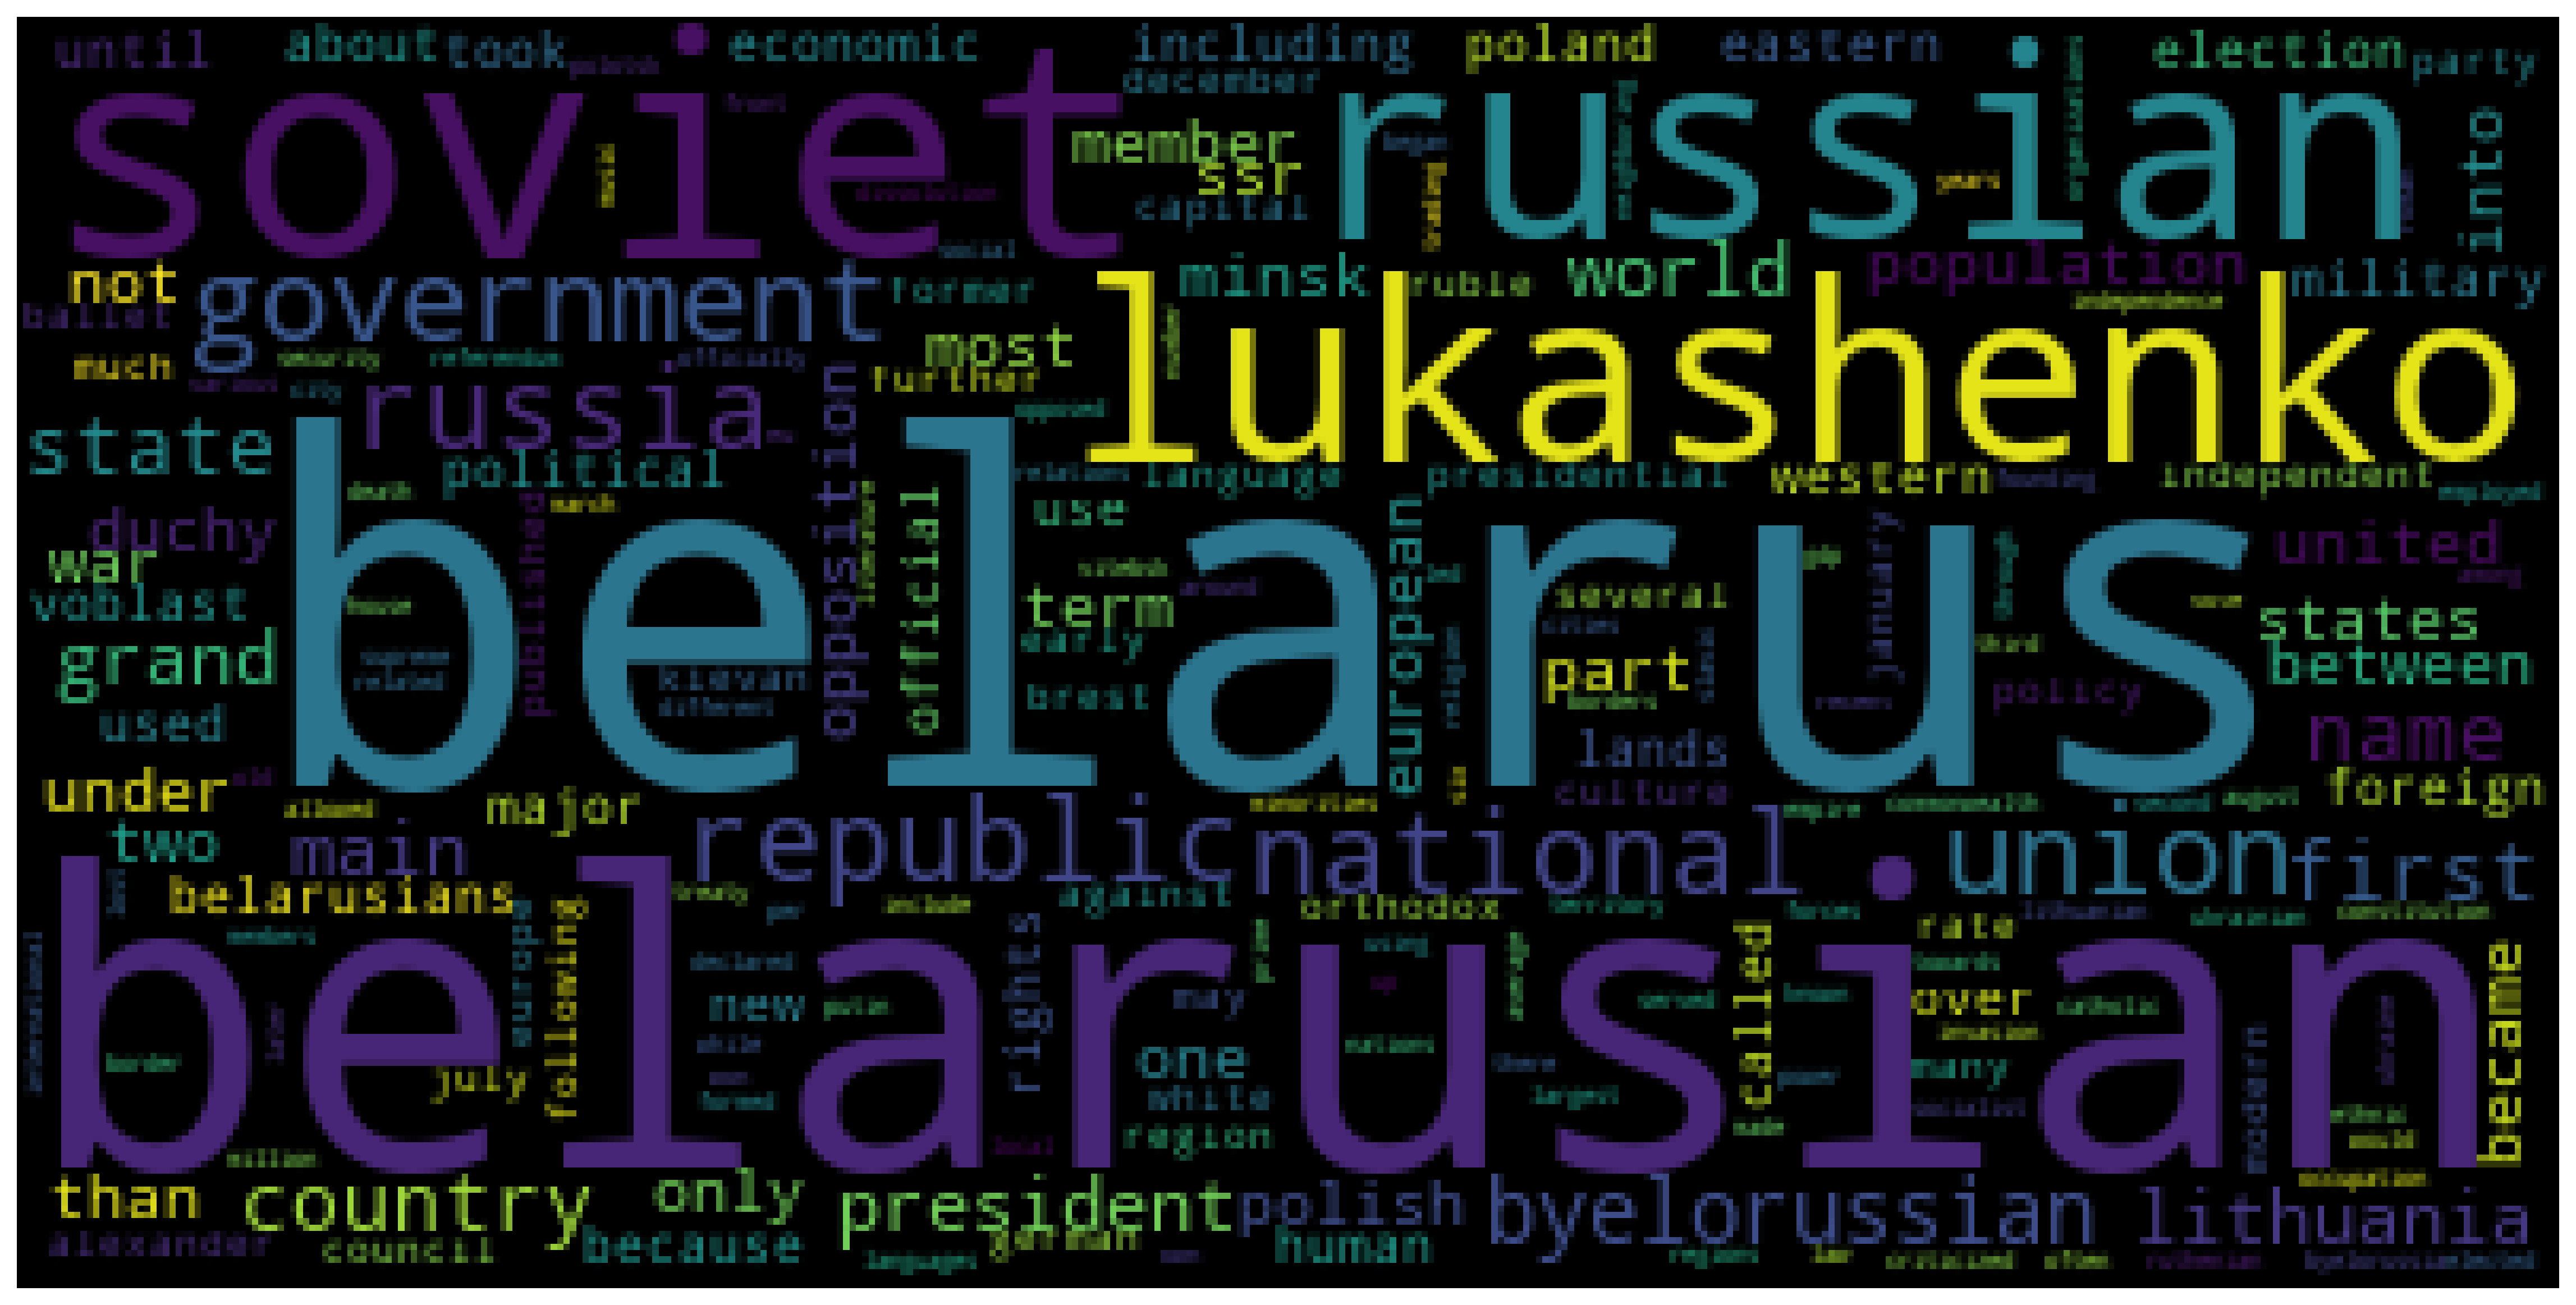

In [9]:
# Display a word cloud image

word_image = calculate_frequencies(file_contents)
plt.figure(figsize=(20,10), dpi=300)
plt.imshow(word_image, interpolation = 'nearest')
plt.axis('off')
plt.show()